In [1]:
import pandas as pd
import numpy as np
from fastai.vision import *
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Defining the path of the Folder that contains Train_images, Test Images, annotations list

In [3]:
path=Path('C:/Thesis projects/Face_clusteing/img_align_celeba_1/')

Defining the transforms(Not always necessary)

In [4]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=30, max_lighting=0.3)#Transformation

Creating the fastai databunch

In [5]:
    data1 = (ImageList.from_csv(path,csv_name='labels.csv',folder='Train_Image')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct()
        
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(cols='label',label_delim=' ')
        .add_test_folder('Test_data')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch(bs=16))                          


Displaying a few data from the test set

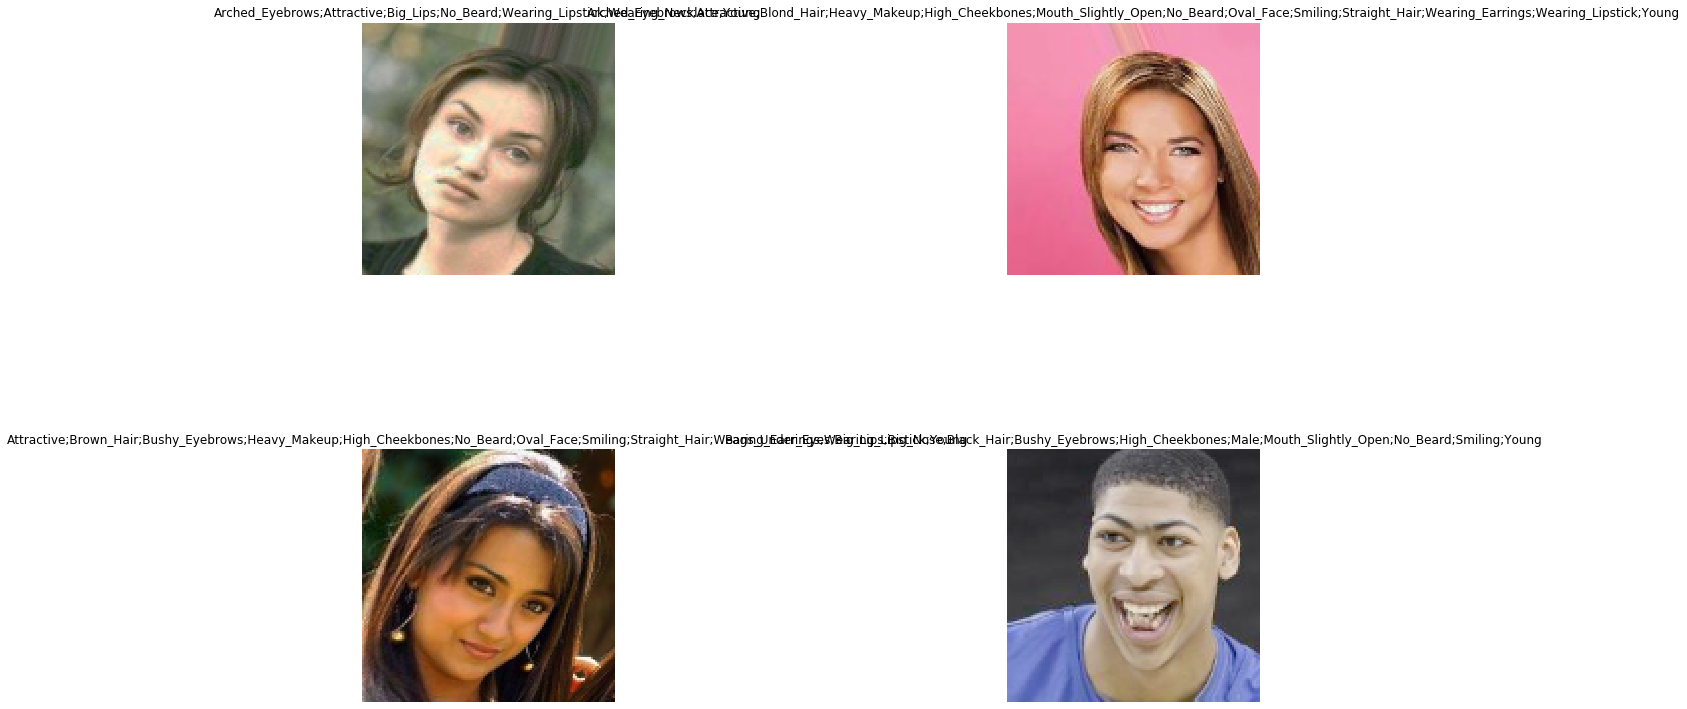

In [8]:
data1.show_batch(rows=2,figsize=(20,12))

#Defining the model

In [19]:
arch2=models.resnet50

Defining the Metrics for model Evaluation

In [20]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
acc_03 = partial (accuracy_thresh, thresh=0.5)
f_score=partial (fbeta,thresh=0.2)

Creating the cnn_learner model with databunch, resnet50 model and evaluation metrics

In [21]:
learn4=cnn_learner(data1,arch2,metrics=[acc_02,acc_03,f_score])

Finding the appropriate learning rate to train the lst layer of the resnet 50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.00E-02


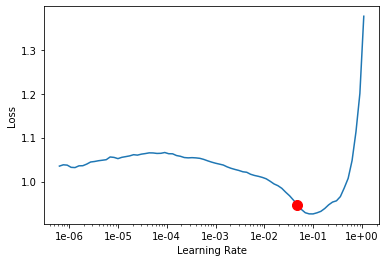

In [23]:
learn4.lr_find()
learn4.recorder.plot(suggestion=True)

In [24]:
lr=4.79E-02

Training the last layer for 1 epoch

In [25]:
learn4.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,fbeta,time
0,0.277502,1.774801,0.832045,0.880785,0.773909,24:26


Printing the number of classes to check

In [26]:
print(data1.c,'\n',data1.classes)

40 
 ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [29]:
#learn4.save('ff_stage-1-rn50_exp_3')

Unfreezing all the layers 

In [27]:


learn4.unfreeze()



Finding the correct learning rate to train the entire resnet model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06
Min loss divided by 10: 5.25E-06


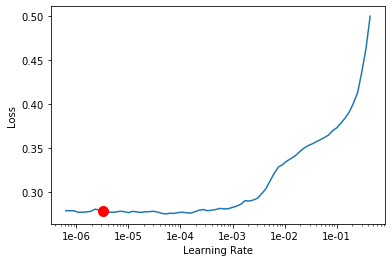

In [28]:
learn4.lr_find()
learn4.recorder.plot(suggestion=True)

Training the entire model, all the layers for 5 epochs

In [29]:
learn4.fit_one_cycle(5, slice(3.31e-06, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,fbeta,time
0,0.277986,0.982107,0.834745,0.885090,0.780937,39:37
1,0.263213,0.543392,0.856453,0.886215,0.780655,39:55
2,0.251274,1.023628,0.859593,0.897788,0.804145,39:48
3,0.233600,0.249892,0.866395,0.908795,0.824367,39:31
4,0.225331,0.223373,0.868280,0.910420,0.827788,39:25


In [35]:
#learn4.fit_one_cycle(5, slice(2.29e-6, lr/5))  :-----Not used right now

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,fbeta,time
0,0.228103,0.239451,0.858775,0.895275,0.791900,03:40
1,0.241495,0.241226,0.845500,0.895675,0.796127,03:40
2,0.233162,0.235052,0.867025,0.898875,0.796667,03:40
3,0.215725,0.228185,0.864900,0.901400,0.802934,03:40
4,0.198686,0.226020,0.865675,0.901900,0.804924,03:41


Saving the mdoel in Models folder

In [30]:
learn4.save('ff_stage-1-rn50_exp_4_50K_Images')

Plotting loss curves (Train and validation)

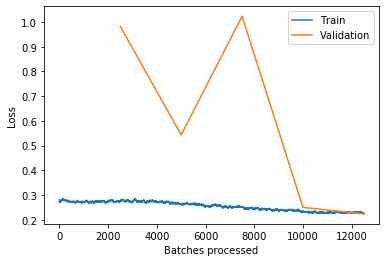

In [31]:
learn4.recorder.plot_losses()

Plotting all the metrics

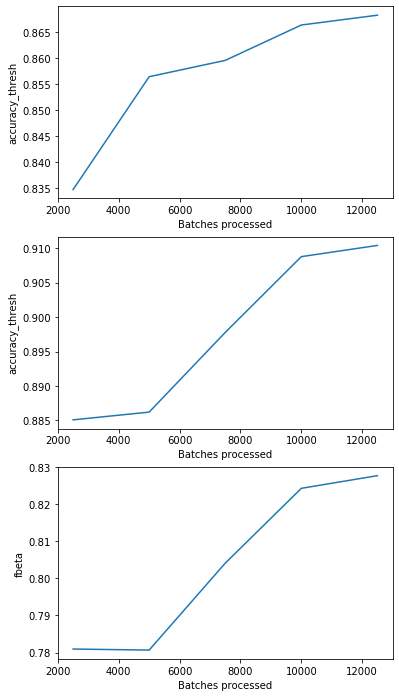

In [32]:
learn4.recorder.plot_metrics()

#Loading the Newly saved model trained with 50 K images


In [6]:
learn=create_cnn(data1,models.resnet50,pretrained=False)
learn.load('ff_stage-1-rn50_exp_4_50K_Images')

C:\Users\Arka_Thesis\Anaconda3\envs\fastai\lib\site-packages\fastai\vision\learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (40000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
Arched_Eyebrows;Attractive;Brown_Hair;Heavy_Makeup;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Pointy_Nose;Smiling;Straight_Hair;Wearing_Earrings;Wearing_Lipstick;Young,Bags_Under_Eyes;Big_Nose;Brown_Hair;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Smiling;Young,Big_Lips;Blurry;Male;Narrow_Eyes;No_Beard;Pointy_Nose;Wavy_Hair;Young,Arched_Eyebrows;Attractive;Big_Lips;Heavy_Makeup;Narrow_Eyes;No_Beard;Pointy_Nose;Wearing_Lipstick;Young,Arched_Eyebrows;Attractive;Big_Lips;Brown_Hair;Heavy_Makeup;Mouth_Slightly_Open;No_Beard;Wavy_Hair;Wearing_Earrings;Wearing_Lipstick;Young
Path: C:\Thesis projects\Face_clusteing\img_align_celeba_1;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList


Evaluating the model

In [7]:
m=learn.model.eval()

Testing the model with the Test Data in the folder 'Test Data'

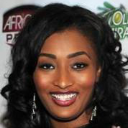

In [8]:
data1.test_ds[0][0]

Predicting the output of the above image

In [9]:
learn.predict(data1.test_ds[0][0])

(MultiCategory Arched_Eyebrows;Attractive;Big_Lips;Black_Hair;Heavy_Makeup;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Oval_Face;Smiling;Wavy_Hair;Wearing_Earrings;Wearing_Lipstick;Young,
 tensor([0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
         1., 0., 0., 1.]),
 tensor([2.8546e-03, 8.3313e-01, 8.6040e-01, 7.0889e-02, 2.8629e-05, 1.3578e-02,
         6.0035e-01, 4.4643e-01, 9.6050e-01, 1.8744e-03, 2.8902e-04, 6.2949e-03,
         4.6586e-01, 1.3375e-02, 7.7603e-03, 2.4115e-05, 1.1445e-03, 3.2863e-05,
         9.8673e-01, 9.8874e-01, 1.6085e-03, 9.9077e-01, 7.7933e-04, 7.4593e-02,
         9.9733e-01, 6.2596e-01, 4.8863e-04, 2.5963e-01, 2.7023e-02, 2.8702e-01,
         4.0846e-04, 9.9632e-01, 7.3658e-03, 9.2705e-01, 8.8308e-01, 3.1864e-04,
         9.9527e-01, 3.0115e-01, 7.0790e-04, 9.8271e-01]))

Loading all  the test set images and passing it to function for clustering

In [13]:
X_test_images=[]
for i in range (0, len(data1.test_ds)):
    X_test_images.append(data1.test_ds[i][0])

Visualizing the test images

In [16]:
import cv2
for img in X_test_images:
    cv2.imshow(img)

TypeError: imshow() missing required argument 'mat' (pos 2)

Trying to cluster images

Male with Black Hair
start time : 1568978970.4779234


C:\Users\Arka_Thesis\Anaconda3\envs\fastai\lib\site-packages\fastai\vision\image.py:429: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
C:\Users\Arka_Thesis\Anaconda3\envs\fastai\lib\site-packages\fastai\vision\image.py:429: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if ax is None: fig,ax = plt.subplots(figsize=figsize)
C:\Users\Arka_Thesis\Anaconda3\envs\fastai\lib\site-packages\fastai\vision\image.py:429: RuntimeWarning: More than 20 figures have been opened. Figures created through the 

End time 1568978983.2385418


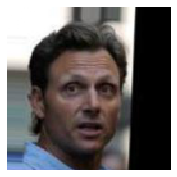

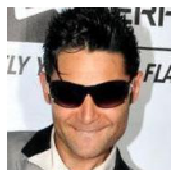

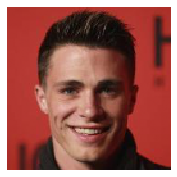

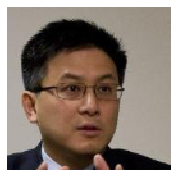

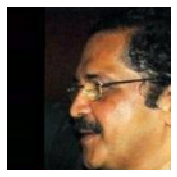

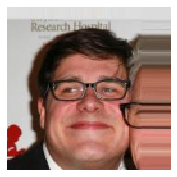

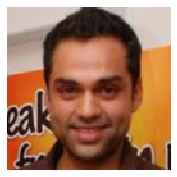

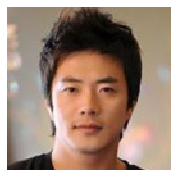

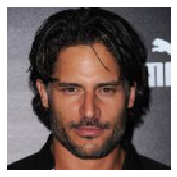

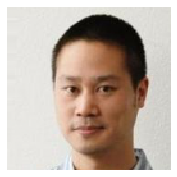

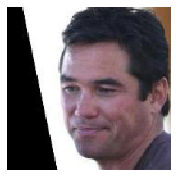

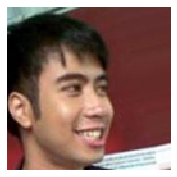

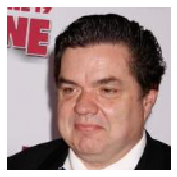

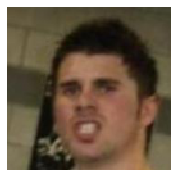

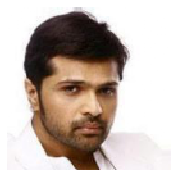

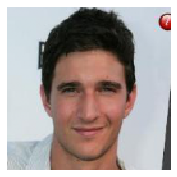

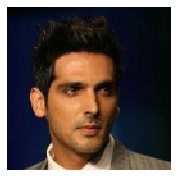

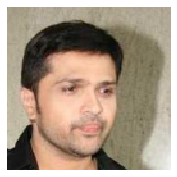

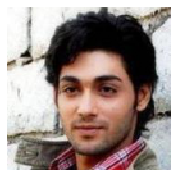

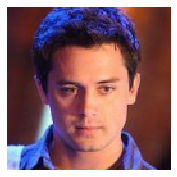

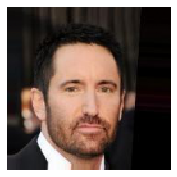

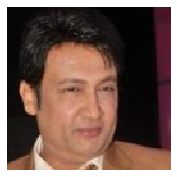

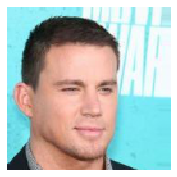

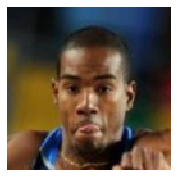

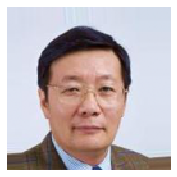

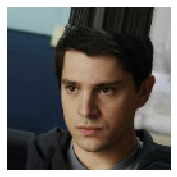

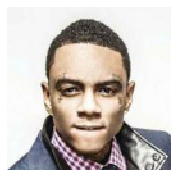

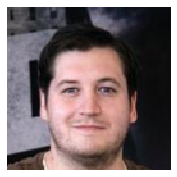

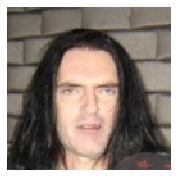

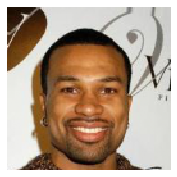

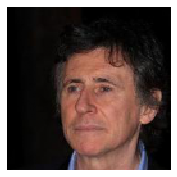

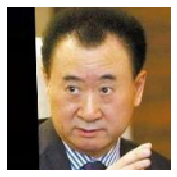

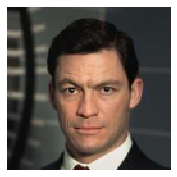

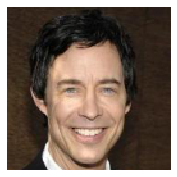

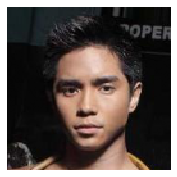

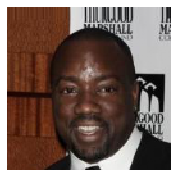

In [21]:
import time
print ("Male with Black Hair")
print("start time :", time.time())
for i in range (0,len(data1.test_ds)):
    category,pred,prob=learn.predict(data1.test_ds[i][0])
    if(pred[8]==1 and pred [20]==1):
        Image.show(data1.test_ds[i][0])
        
print("End time", time.time())

In [2]:
import torch
torch.cuda.get_device_name()


'GeForce 940MX'

In [86]:
#Clustering based on labels

In [88]:
predictios=learn4.predict(data1.test_ds[1][0])

In [94]:
type(predictios[2])

torch.Tensor

In [95]:
for i in predictios[2]:
    print(i)

tensor(0.0021)
tensor(0.6263)
tensor(0.9130)
tensor(0.0550)
tensor(0.0001)
tensor(0.0756)
tensor(0.4389)
tensor(0.1174)
tensor(0.8247)
tensor(0.0049)
tensor(0.0020)
tensor(0.0927)
tensor(0.1394)
tensor(0.0047)
tensor(0.0033)
tensor(0.0022)
tensor(0.0005)
tensor(0.0004)
tensor(0.9474)
tensor(0.9233)
tensor(0.0064)
tensor(0.7992)
tensor(0.0007)
tensor(0.0766)
tensor(0.9991)
tensor(0.4785)
tensor(0.0174)
tensor(0.4127)
tensor(0.0162)
tensor(0.2115)
tensor(0.0003)
tensor(0.9480)
tensor(0.3060)
tensor(0.4763)
tensor(0.3985)
tensor(9.1285e-05)
tensor(0.9826)
tensor(0.2623)
tensor(0.0035)
tensor(0.9545)
